In [70]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
amazon5 = pd.read_csv("data/amazon5_lemmatized.csv",header=0,index_col=0)
corpus = set()
for i in range(len(amazon5['lemmatized_text'])):
    corpus.add(amazon5['lemmatized_text'][i])
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.to_csv("amazon5_tfidf_features.csv", index=False, header=True)
amazon5_tfidf = pd.read_csv("amazon5_tfidf_features.csv",header=0)
amazon5_tfidf = normalize(amazon5_tfidf)

In [54]:
import os
amazon5 = pd.read_csv(os.getcwd()+"/data/amazon5.csv",header=0)
pca = PCA(n_components=2)
amazon5_tfidf_reduced = pca.fit_transform(amazon5_tfidf)
labels = amazon5["label"]

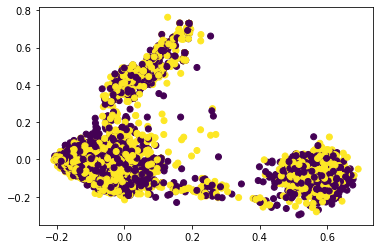

In [55]:
import matplotlib.pyplot as plt
plt.scatter(pd.DataFrame(amazon5_tfidf_reduced)[0],pd.DataFrame(amazon5_tfidf_reduced)[1],c=labels)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(amazon5_tfidf_reduced, labels, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(classification_report(y_test, clf.predict(X_test)))
print(f1_score(y_test,clf.predict(X_test),zero_division=1))

0.5080321285140562
              precision    recall  f1-score   support

          -1       0.48      0.64      0.55      1230
           1       0.49      0.34      0.40      1260

    accuracy                           0.49      2490
   macro avg       0.49      0.49      0.47      2490
weighted avg       0.49      0.49      0.47      2490

0.39943741209563993


In [51]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(classification_report(y_test, clf_NB.predict(X_test)))
print(f1_score(y_test,clf_NB.predict(X_test),zero_division=1))

0.5080321285140562
              precision    recall  f1-score   support

          -1       0.47      0.18      0.26      1230
           1       0.50      0.81      0.62      1260

    accuracy                           0.50      2490
   macro avg       0.49      0.49      0.44      2490
weighted avg       0.49      0.50      0.44      2490

0.6182370820668692
